In [1]:
import os
import torch
import numpy as np
import pandas as pd

from Utility_Modified import *

from matplotlib import pyplot as plt

### Define optimizers

In [2]:
sgd = torch.optim.SGD

# SWA

In [3]:
swa_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'rel_imp_std', 'irrel_imp_std', 'rand_imp_std',
                               'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### SWA; N = 50, p = 6, d = 4

In [4]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.44258 | train_auc: 0.52174 | valid_auc: 0.5     |  0:00:00s
epoch 1  | loss: 1.71603 | train_auc: 0.4538  | valid_auc: 0.33333 |  0:00:00s
epoch 2  | loss: 1.713   | train_auc: 0.49457 | valid_auc: 0.5     |  0:00:00s
epoch 3  | loss: 1.82575 | train_auc: 0.4837  | valid_auc: 0.5     |  0:00:00s
epoch 4  | loss: 2.21751 | train_auc: 0.48913 | valid_auc: 0.66667 |  0:00:00s
epoch 5  | loss: 1.65266 | train_auc: 0.44837 | valid_auc: 0.66667 |  0:00:01s
epoch 6  | loss: 2.18499 | train_auc: 0.42663 | valid_auc: 0.66667 |  0:00:01s
epoch 7  | loss: 1.74623 | train_auc: 0.41033 | valid_auc: 0.66667 |  0:00:01s
epoch 8  | loss: 1.54062 | train_auc: 0.41576 | valid_auc: 0.66667 |  0:00:01s
epoch 9  | loss: 2.16137 | train_auc: 0.42935 | valid_auc: 0.66667 |  0:00:01s
epoch 10 | loss: 1.92413 | train_auc: 0.44022 | valid_auc: 0.83333 |  0:00:01s
epoch 11 | loss: 2.18197 | train_auc: 0.44565 | valid_auc: 0.66667 |  0:00:01s
epoch 12 | loss: 2.23577 | train_auc: 0.4375  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.14045380710811245
Average irrelevant feature importance: 0.07738270822477632
Average random feature importance: 0.12173606527736153
Relevant feature importance: [0.15715447 0.12375314]
Irrelevant feature importance: [0.06384058 0.08192568 0.08638186]
Random feature importance: [0.12490317 0.06737015 0.15167587 0.14299507]
Train AUC score: 0.48641304347826086
Validation AUC score: 1.0
Test AUC score: 0.625
False negative rate for relevant features: 0.5
False positive rate for irrelevant features: 0.0
False positive rate for random features: 0.75


C:\Users\hberg\AppData\Local\Temp\ipykernel_13192\3911437465.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)


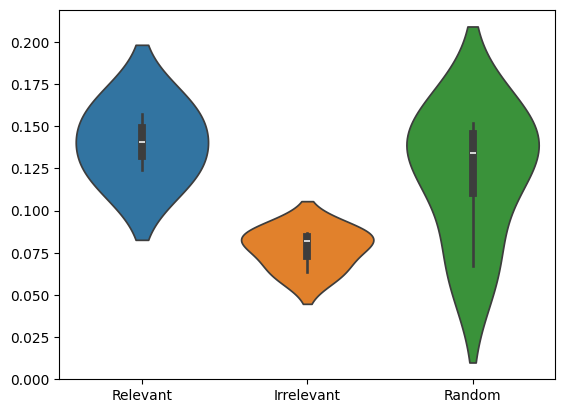

In [5]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

### SWA; N = 50, p = 60, d = 40

In [6]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.0486  | train_auc: 0.50794 | valid_auc: 0.25    |  0:00:00s
epoch 1  | loss: 0.74702 | train_auc: 0.52116 | valid_auc: 0.25    |  0:00:00s
epoch 2  | loss: 0.75185 | train_auc: 0.51587 | valid_auc: 0.5     |  0:00:00s
epoch 3  | loss: 0.83163 | train_auc: 0.52381 | valid_auc: 0.5     |  0:00:00s
epoch 4  | loss: 0.94822 | train_auc: 0.42593 | valid_auc: 0.25    |  0:00:00s
epoch 5  | loss: 0.79813 | train_auc: 0.44974 | valid_auc: 0.5     |  0:00:01s
epoch 6  | loss: 0.9798  | train_auc: 0.46296 | valid_auc: 0.5     |  0:00:01s
epoch 7  | loss: 0.82686 | train_auc: 0.46825 | valid_auc: 0.5     |  0:00:01s
epoch 8  | loss: 0.86808 | train_auc: 0.49206 | valid_auc: 0.5     |  0:00:01s
epoch 9  | loss: 0.85002 | train_auc: 0.50529 | valid_auc: 0.5     |  0:00:01s
epoch 10 | loss: 0.87433 | train_auc: 0.50265 | valid_auc: 0.5     |  0:00:01s
epoch 11 | loss: 1.00884 | train_auc: 0.5     | valid_auc: 0.5     |  0:00:02s
epoch 12 | loss: 0.83211 | train_auc: 0.51587 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.010363260169462336
Average irrelevant feature importance: 0.010385638782180911
Average random feature importance: 0.009694050498596335
Relevant feature importance: [0.01964483 0.00660338 0.00445631 0.00923238 0.00632213 0.00639332
 0.02474315 0.01079729 0.00742216 0.00881781 0.00961296 0.01575511
 0.00374463 0.01220499 0.00869527 0.00580165 0.0059759  0.00719957
 0.01372332 0.01865263 0.01129247 0.01079202 0.01047171]
Irrelevant feature importance: [0.0092235  0.00587267 0.01609431 0.0236915  0.0028204  0.00559775
 0.00902247 0.01061399 0.00494136 0.00616282 0.0117099  0.00745212
 0.0111291  0.01028941 0.00829627 0.02067329 0.01601585 0.00607517
 0.00536085 0.00407797 0.01504837 0.00777964 0.00564101 0.0032411
 0.0099368  0.00838162 0.0130886  0.01001737 0.01198486 0.00626655
 0.02918102 0.00562612 0.02409786 0.00784495 0.01263593 0.00799049]
Random feature importance: [0.01758059 0.00682116 0.005892   0.01201269 0.01683176 0.00635591
 0.01428933 

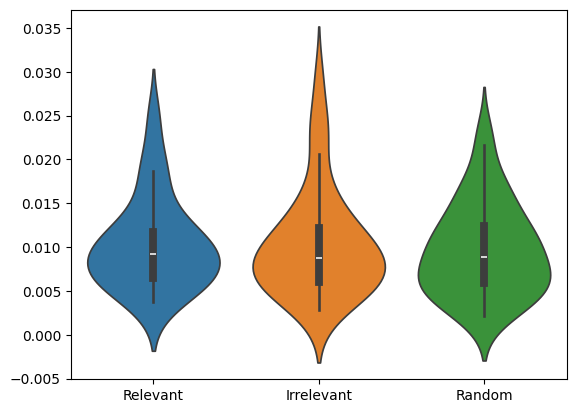

In [7]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

### SWA; N = 50, p = 600, d = 400

In [8]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.97435 | train_auc: 0.51579 | valid_auc: 1.0     |  0:00:00s
epoch 1  | loss: 0.9631  | train_auc: 0.56053 | valid_auc: 1.0     |  0:00:01s
epoch 2  | loss: 0.98089 | train_auc: 0.50263 | valid_auc: 1.0     |  0:00:02s
epoch 3  | loss: 0.88863 | train_auc: 0.44737 | valid_auc: 1.0     |  0:00:02s
epoch 4  | loss: 0.94655 | train_auc: 0.42368 | valid_auc: 1.0     |  0:00:03s
epoch 5  | loss: 1.00915 | train_auc: 0.44737 | valid_auc: 1.0     |  0:00:04s
epoch 6  | loss: 1.03987 | train_auc: 0.45    | valid_auc: 1.0     |  0:00:04s
epoch 7  | loss: 0.91642 | train_auc: 0.44737 | valid_auc: 1.0     |  0:00:05s
epoch 8  | loss: 1.00583 | train_auc: 0.45263 | valid_auc: 1.0     |  0:00:06s
epoch 9  | loss: 0.92772 | train_auc: 0.42632 | valid_auc: 1.0     |  0:00:06s
epoch 10 | loss: 1.04487 | train_auc: 0.41579 | valid_auc: 0.66667 |  0:00:07s
epoch 11 | loss: 0.84038 | train_auc: 0.36316 | valid_auc: 0.33333 |  0:00:08s
epoch 12 | loss: 0.98107 | train_auc: 0.39737 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0004347109138405256
Average irrelevant feature importance: 0.0011288428418245778
Average random feature importance: 0.0008789710371660997
Relevant feature importance: [7.03622769e-05 8.36257526e-05 7.79073103e-05 3.13079201e-04
 4.28184480e-04 1.73544968e-04 2.63569103e-04 2.71565022e-04
 1.22469960e-04 7.39887964e-05 1.27853829e-04 7.59929635e-05
 1.75368890e-04 1.78339653e-04 1.21120914e-03 2.17468736e-03
 2.04765251e-04 7.85056113e-05 1.27921572e-04 1.91409051e-04
 1.83804958e-04 3.40902175e-04 1.07953981e-03 1.51792319e-04
 2.48959394e-05 5.44347723e-03 6.92535393e-04 2.31825563e-04
 3.55105215e-04 2.28632725e-04 2.02200328e-04 1.64327102e-04
 1.79536859e-04 2.85330020e-04 9.61583400e-05 2.69184887e-04
 3.84943788e-05 4.33307323e-04 3.00938294e-04 2.62097501e-04]
Irrelevant feature importance: [1.29464502e-04 7.87122548e-04 5.32511573e-05 7.02148776e-05
 2.27351928e-04 4.18600529e-04 6.24279466e-05 1.76777303e-04
 2.10670449e-04 1.58331034e-04

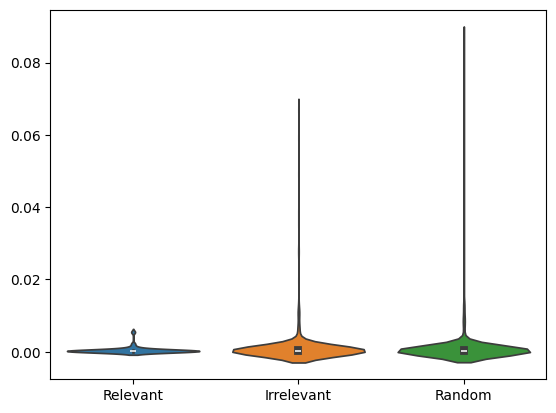

In [9]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

### SWA; N = 500, p = 6, d = 4

In [10]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.9127  | train_auc: 0.40847 | valid_auc: 0.49928 |  0:00:01s
epoch 1  | loss: 0.98455 | train_auc: 0.42689 | valid_auc: 0.49639 |  0:00:02s
epoch 2  | loss: 0.98626 | train_auc: 0.46652 | valid_auc: 0.56421 |  0:00:03s
epoch 3  | loss: 0.9445  | train_auc: 0.45339 | valid_auc: 0.57143 |  0:00:04s
epoch 4  | loss: 0.91861 | train_auc: 0.48194 | valid_auc: 0.57864 |  0:00:05s
epoch 5  | loss: 0.86972 | train_auc: 0.48504 | valid_auc: 0.59452 |  0:00:06s
epoch 6  | loss: 0.96091 | train_auc: 0.47899 | valid_auc: 0.5671  |  0:00:07s
epoch 7  | loss: 0.85523 | train_auc: 0.45846 | valid_auc: 0.54113 |  0:00:08s
epoch 8  | loss: 0.93826 | train_auc: 0.49569 | valid_auc: 0.56854 |  0:00:10s
epoch 9  | loss: 0.9141  | train_auc: 0.49368 | valid_auc: 0.57431 |  0:00:11s
epoch 10 | loss: 0.9779  | train_auc: 0.50134 | valid_auc: 0.557   |  0:00:12s
epoch 11 | loss: 0.89728 | train_auc: 0.50076 | valid_auc: 0.5469  |  0:00:12s
epoch 12 | loss: 0.87691 | train_auc: 0.49196 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.13313835652524583
Average irrelevant feature importance: 0.11907901520593787
Average random feature importance: 0.09060672500309669
Relevant feature importance: [0.1830867  0.12858147 0.0877469 ]
Irrelevant feature importance: [0.11816527 0.11999276]
Random feature importance: [0.0788419  0.08027937 0.10612236 0.09718327]
Train AUC score: 0.8551166423136999
Validation AUC score: 0.8744588744588745
Test AUC score: 0.8927125506072875
False negative rate for relevant features: 0.3333333333333333
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


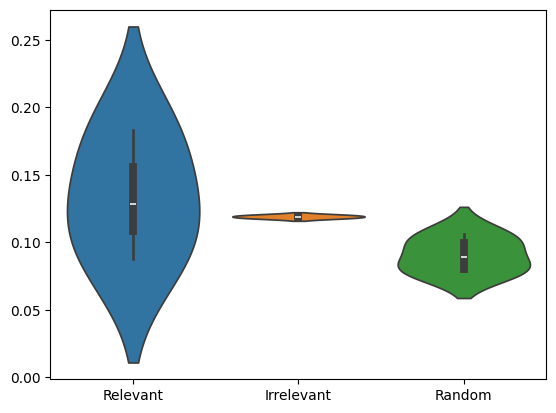

In [11]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

### SWA; N = 500, p = 60, d = 40

In [12]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94606 | train_auc: 0.45568 | valid_auc: 0.44845 |  0:00:00s
epoch 1  | loss: 0.97442 | train_auc: 0.4514  | valid_auc: 0.52547 |  0:00:01s
epoch 2  | loss: 0.96112 | train_auc: 0.45321 | valid_auc: 0.55404 |  0:00:02s
epoch 3  | loss: 0.93815 | train_auc: 0.47519 | valid_auc: 0.49689 |  0:00:03s
epoch 4  | loss: 0.99951 | train_auc: 0.47651 | valid_auc: 0.46708 |  0:00:04s
epoch 5  | loss: 0.92049 | train_auc: 0.45902 | valid_auc: 0.45714 |  0:00:05s
epoch 6  | loss: 0.98237 | train_auc: 0.48629 | valid_auc: 0.49565 |  0:00:06s
epoch 7  | loss: 0.90013 | train_auc: 0.50428 | valid_auc: 0.53168 |  0:00:07s
epoch 8  | loss: 0.87636 | train_auc: 0.49687 | valid_auc: 0.5205  |  0:00:08s
epoch 9  | loss: 0.9055  | train_auc: 0.51754 | valid_auc: 0.54534 |  0:00:08s
epoch 10 | loss: 0.90366 | train_auc: 0.5188  | valid_auc: 0.53168 |  0:00:09s
epoch 11 | loss: 0.85425 | train_auc: 0.51277 | valid_auc: 0.48447 |  0:00:10s
epoch 12 | loss: 0.93248 | train_auc: 0.5437  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.011814385939505583
Average irrelevant feature importance: 0.010494496964731285
Average random feature importance: 0.00892666693837292
Relevant feature importance: [0.01511859 0.01158667 0.01406807 0.01104161 0.00989182 0.01368249
 0.00853347 0.00800394 0.00944363 0.00998353 0.00482204 0.0074252
 0.01284991 0.00950793 0.01740138 0.01965989 0.00938576 0.02025301]
Irrelevant feature importance: [0.0097489  0.00811841 0.01018433 0.01481432 0.00890301 0.00552857
 0.00676766 0.01383103 0.00744834 0.00720581 0.00662234 0.00916705
 0.01024215 0.01089192 0.00787407 0.01131429 0.00658186 0.00836466
 0.00637428 0.00961518 0.01115614 0.01362151 0.00619627 0.00960755
 0.00858191 0.01135404 0.01090205 0.02046342 0.01147018 0.00800847
 0.0103927  0.01243495 0.00781742 0.01276648 0.03007128 0.01205301
 0.00946247 0.00686288 0.0176906  0.01210305 0.00765982]
Random feature importance: [0.00635458 0.00507052 0.01136115 0.01384813 0.00620967 0.01114296
 0.00911773 0

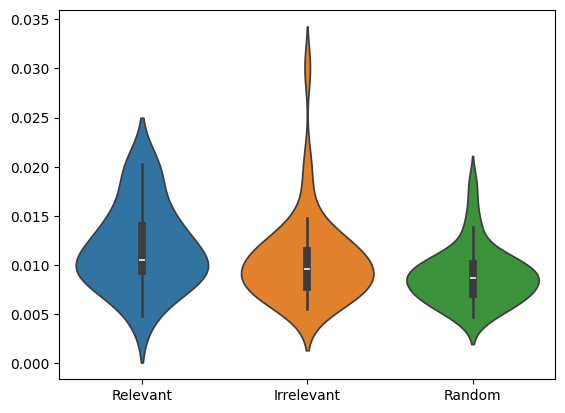

In [13]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

### SWA; N = 500, p = 600, d = 400

In [14]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.46377 | train_auc: 0.36514 | valid_auc: 0.4     |  0:00:02s
epoch 1  | loss: 1.27979 | train_auc: 0.39981 | valid_auc: 0.36857 |  0:00:04s
epoch 2  | loss: 1.27875 | train_auc: 0.4184  | valid_auc: 0.27714 |  0:00:06s
epoch 3  | loss: 1.38502 | train_auc: 0.43257 | valid_auc: 0.32286 |  0:00:08s
epoch 4  | loss: 1.51512 | train_auc: 0.42032 | valid_auc: 0.38286 |  0:00:10s
epoch 5  | loss: 1.43674 | train_auc: 0.41917 | valid_auc: 0.28286 |  0:00:13s
epoch 6  | loss: 1.23872 | train_auc: 0.40193 | valid_auc: 0.43429 |  0:00:15s
epoch 7  | loss: 1.29497 | train_auc: 0.4043  | valid_auc: 0.42571 |  0:00:17s
epoch 8  | loss: 1.27845 | train_auc: 0.42195 | valid_auc: 0.36286 |  0:00:19s
epoch 9  | loss: 1.42768 | train_auc: 0.42724 | valid_auc: 0.47429 |  0:00:21s
epoch 10 | loss: 1.43485 | train_auc: 0.461   | valid_auc: 0.45143 |  0:00:23s
epoch 11 | loss: 1.31209 | train_auc: 0.449   | valid_auc: 0.39714 |  0:00:25s
epoch 12 | loss: 1.48559 | train_auc: 0.44665 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0010535685004193036
Average irrelevant feature importance: 0.001013819273528648
Average random feature importance: 0.0009721664503698654
Relevant feature importance: [0.00142165 0.00061771 0.00160131 0.00073403 0.00059171 0.00080953
 0.00127801 0.00079048 0.00146125 0.00088529 0.00072203 0.00071965
 0.00123243 0.00064286 0.00056144 0.00056253 0.0008996  0.00048658
 0.00151256 0.00054434 0.00095855 0.00140825 0.00087612 0.00146591
 0.00080566 0.00035538 0.00107825 0.00058297 0.00052943 0.00072173
 0.00087131 0.00266033 0.00059106 0.00107094 0.00074312 0.00118317
 0.00120782 0.00034249 0.00077622 0.001382   0.00043358 0.00136369
 0.00049776 0.00083935 0.00066745 0.00065663 0.00167953 0.0007863
 0.00047592 0.00100376 0.0004232  0.00185955 0.00721536 0.00169525
 0.00041875 0.000614   0.00052661 0.0009328  0.00060937 0.00058274
 0.00103147 0.00109898 0.0005572  0.00143474 0.00107034 0.00055198
 0.00151363 0.00071022 0.002215   0.00108906 0.00348264 0.0

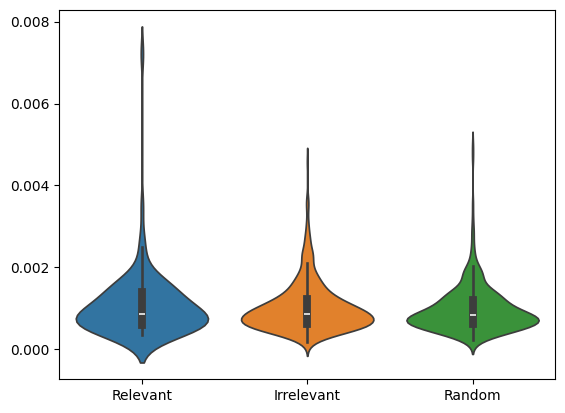

In [15]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

### SWA; N = 5000, p = 6, d = 4

In [16]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.97561 | train_auc: 0.57603 | valid_auc: 0.59351 |  0:00:07s
epoch 1  | loss: 0.78847 | train_auc: 0.58797 | valid_auc: 0.62785 |  0:00:15s
epoch 2  | loss: 0.70493 | train_auc: 0.64108 | valid_auc: 0.66958 |  0:00:22s
epoch 3  | loss: 0.67042 | train_auc: 0.66248 | valid_auc: 0.68906 |  0:00:30s
epoch 4  | loss: 0.66172 | train_auc: 0.6905  | valid_auc: 0.71158 |  0:00:38s
epoch 5  | loss: 0.63832 | train_auc: 0.70188 | valid_auc: 0.71182 |  0:00:46s
epoch 6  | loss: 0.62485 | train_auc: 0.72043 | valid_auc: 0.7371  |  0:00:54s
epoch 7  | loss: 0.61005 | train_auc: 0.73775 | valid_auc: 0.73883 |  0:01:01s
epoch 8  | loss: 0.60503 | train_auc: 0.74509 | valid_auc: 0.74825 |  0:01:09s
epoch 9  | loss: 0.60276 | train_auc: 0.76189 | valid_auc: 0.76074 |  0:01:17s
epoch 10 | loss: 0.59482 | train_auc: 0.7801  | valid_auc: 0.77654 |  0:01:24s
epoch 11 | loss: 0.5752  | train_auc: 0.78233 | valid_auc: 0.77884 |  0:01:32s
epoch 12 | loss: 0.58318 | train_auc: 0.79402 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.130929191378465
Average irrelevant feature importance: 0.35036254272244177
Average random feature importance: 0.031480172940924575
Relevant feature importance: [0.20416892 0.076228   0.08043561 0.16288424]
Irrelevant feature importance: [0.35036254]
Random feature importance: [0.03234464 0.0237889  0.0225598  0.04722735]
Train AUC score: 0.9113176154500301
Validation AUC score: 0.9029349928517365
Test AUC score: 0.9102023319615913
False negative rate for relevant features: 0.25
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


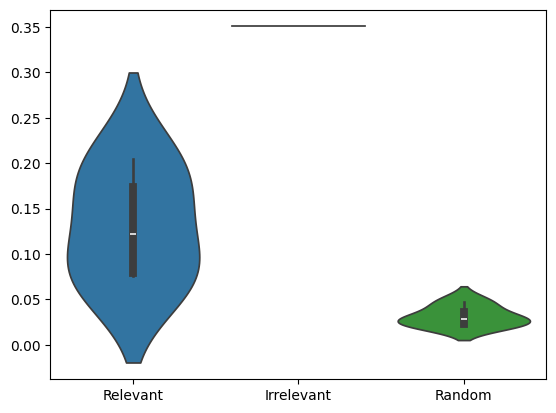

In [17]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

### SWA; N = 5000, p = 60, d = 40

In [18]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.86901 | train_auc: 0.48673 | valid_auc: 0.45694 |  0:00:08s
epoch 1  | loss: 0.86469 | train_auc: 0.49712 | valid_auc: 0.48419 |  0:00:17s
epoch 2  | loss: 0.86311 | train_auc: 0.50552 | valid_auc: 0.45186 |  0:00:25s
epoch 3  | loss: 0.85643 | train_auc: 0.52546 | valid_auc: 0.46202 |  0:00:34s
epoch 4  | loss: 0.832   | train_auc: 0.53752 | valid_auc: 0.49842 |  0:00:43s
epoch 5  | loss: 0.83696 | train_auc: 0.53455 | valid_auc: 0.4964  |  0:00:51s
epoch 6  | loss: 0.81301 | train_auc: 0.53023 | valid_auc: 0.48592 |  0:01:00s
epoch 7  | loss: 0.80064 | train_auc: 0.54092 | valid_auc: 0.48546 |  0:01:08s
epoch 8  | loss: 0.80177 | train_auc: 0.53661 | valid_auc: 0.49941 |  0:01:17s
epoch 9  | loss: 0.79474 | train_auc: 0.55865 | valid_auc: 0.51782 |  0:01:25s
epoch 10 | loss: 0.77844 | train_auc: 0.55167 | valid_auc: 0.5022  |  0:01:34s
epoch 11 | loss: 0.79652 | train_auc: 0.55178 | valid_auc: 0.52013 |  0:01:43s
epoch 12 | loss: 0.80251 | train_auc: 0.55845 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.00857103368615937
Average irrelevant feature importance: 0.012351026263131707
Average random feature importance: 0.007821734220548123
Relevant feature importance: [0.00256709 0.00903851 0.01047218 0.01499891 0.00932091 0.00293872
 0.01093016 0.01029052 0.00744033 0.01141138 0.00487266]
Irrelevant feature importance: [0.00885678 0.01539731 0.00901691 0.00992951 0.02834529 0.00432749
 0.00544995 0.00668448 0.01138012 0.00634362 0.00210405 0.0198828
 0.02633441 0.01547268 0.00604526 0.00415295 0.04363948 0.01494522
 0.00403263 0.01267023 0.01506061 0.01005397 0.00771991 0.0126848
 0.01611503 0.00821715 0.00651469 0.00554178 0.019842   0.01191483
 0.01013674 0.05360323 0.00345958 0.01827926 0.00710962 0.01061513
 0.00670691 0.02628296 0.00335154 0.0069911  0.00154636 0.00704922
 0.00788469 0.01055695 0.01039916 0.01205624 0.01837717 0.00976746]
Random feature importance: [0.00481843 0.01101495 0.00735825 0.00552875 0.00564741 0.00546053
 0.00692819 0.

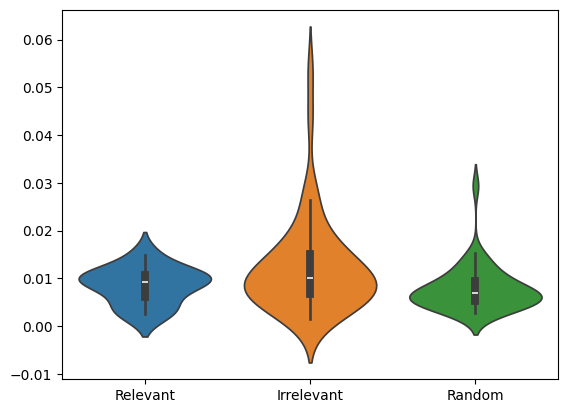

In [19]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

### SWA; N = 5000, p = 600, d = 400

In [20]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_swa_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:85: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.92274 | train_auc: 0.4342  | valid_auc: 0.41485 |  0:00:17s
epoch 1  | loss: 0.92489 | train_auc: 0.4435  | valid_auc: 0.45287 |  0:00:35s
epoch 2  | loss: 0.9109  | train_auc: 0.47042 | valid_auc: 0.45326 |  0:00:52s
epoch 3  | loss: 0.91527 | train_auc: 0.48009 | valid_auc: 0.45781 |  0:01:10s
epoch 4  | loss: 0.90967 | train_auc: 0.48097 | valid_auc: 0.42505 |  0:01:28s
epoch 5  | loss: 0.90463 | train_auc: 0.46693 | valid_auc: 0.45131 |  0:01:46s
epoch 6  | loss: 0.90976 | train_auc: 0.48494 | valid_auc: 0.44715 |  0:02:04s
epoch 7  | loss: 0.89604 | train_auc: 0.48163 | valid_auc: 0.4311  |  0:02:21s
epoch 8  | loss: 0.89674 | train_auc: 0.47091 | valid_auc: 0.44446 |  0:02:39s
epoch 9  | loss: 0.89589 | train_auc: 0.47654 | valid_auc: 0.42476 |  0:02:57s
epoch 10 | loss: 0.8841  | train_auc: 0.4784  | valid_auc: 0.47278 |  0:03:16s
epoch 11 | loss: 0.88814 | train_auc: 0.48014 | valid_auc: 0.459   |  0:03:36s
epoch 12 | loss: 0.8867  | train_auc: 0.4831  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0010257310443977867
Average irrelevant feature importance: 0.0010391610026792453
Average random feature importance: 0.000955238288131367
Relevant feature importance: [0.00206694 0.00079509 0.00071736 0.00042888 0.00098255 0.00118809
 0.00045674 0.00079125 0.00058332 0.00211419 0.00096736 0.00118596
 0.00073924 0.00124134 0.00075003 0.00061584 0.00076194 0.00074876
 0.00144046 0.00092931 0.00095017 0.00045512 0.00033409 0.00148807
 0.00082161 0.00072877 0.00070297 0.00087991 0.00092137 0.00276596
 0.00048275 0.00068081 0.00169126 0.00165523 0.00049327 0.00116017
 0.0008569  0.00212844 0.00087591 0.00047912 0.00059302 0.00096712
 0.00203527 0.00107425 0.00056896 0.00241299 0.00027429 0.00064261
 0.00092577 0.00057329 0.00059439 0.00202612 0.00086285 0.00069329
 0.00092742 0.00092761 0.00160933 0.00059501 0.00057302 0.00106863
 0.00135386 0.00061519 0.00061234 0.00047085 0.00063366 0.00182511
 0.00093107 0.00083013 0.00070016 0.0008561  0.00201904 0.

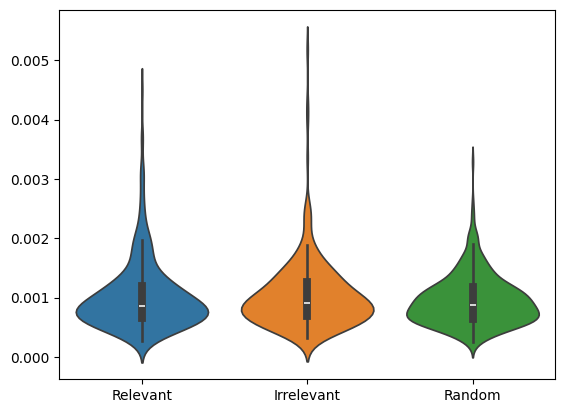

In [21]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_swa_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_swa_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SWA_V2", "violin_plot_swa_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
swa_df = pd.concat([swa_df, pd.DataFrame([new_row])], ignore_index=True)

In [22]:
swa_df.to_csv(os.path.join("Results/SWA_V2", "swa_data.csv"), index=False)